<a href="https://colab.research.google.com/github/LuchoValr/Pruebas-codigos/blob/main/Vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn
!pip install keras
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2238a7d34523f2fbe3f3afb6cce09003fe8e22b35d0372d538bed339d1706659
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
wine=pd.read_excel('/content/drive/MyDrive/vinos.xlsx')

In [3]:
X=wine.iloc[:,1:13].values
Y_num=wine.iloc[:,0].values

In [4]:
n_clases=3
Y=np_utils.to_categorical(Y_num,n_clases)

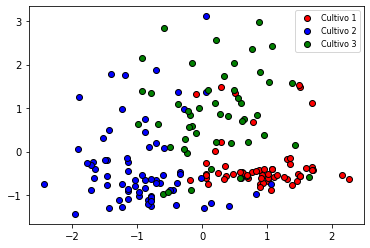

In [5]:
idx0=np.where(Y_num==0)
idx1=np.where(Y_num==1)
idx2=np.where(Y_num==2)
plt.scatter(X[idx0,0],X[idx0,1],c='red',edgecolor='k',label='Cultivo 1')
plt.scatter(X[idx1,0],X[idx1,1],c='blue',edgecolor='k',label='Cultivo 2')
plt.scatter(X[idx2,0],X[idx2,1],c='green',edgecolor='k',label='Cultivo 3')
plt.legend(fontsize=8,loc='upper right')
plt.show()

In [6]:
np.random.seed(1)
input_dim=X.shape[1]
output_dim=Y.shape[1]

modelo=Sequential()
modelo.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))
modelo.add(Dense(output_dim,activation='softmax'))
modelo.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'])

history=modelo.fit(X,Y,epochs=4000,batch_size=X.shape[0],verbose=2)

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 1501/4000
1/1 - 0s - loss: 0.4182 - acc: 0.9719 - 4ms/epoch - 4ms/step
Epoch 1502/4000
1/1 - 0s - loss: 0.4179 - acc: 0.9719 - 4ms/epoch - 4ms/step
Epoch 1503/4000
1/1 - 0s - loss: 0.4176 - acc: 0.9719 - 4ms/epoch - 4ms/step
Epoch 1504/4000
1/1 - 0s - loss: 0.4173 - acc: 0.9719 - 4ms/epoch - 4ms/step
Epoch 1505/4000
1/1 - 0s - loss: 0.4169 - acc: 0.9719 - 12ms/epoch - 12ms/step
Epoch 1506/4000
1/1 - 0s - loss: 0.4166 - acc: 0.9719 - 5ms/epoch - 5ms/step
Epoch 1507/4000
1/1 - 0s - loss: 0.4163 - acc: 0.9719 - 5ms/epoch - 5ms/step
Epoch 1508/4000
1/1 - 0s - loss: 0.4160 - acc: 0.9719 - 4ms/epoch - 4ms/step
Epoch 1509/4000
1/1 - 0s - loss: 0.4157 - acc: 0.9719 - 5ms/epoch - 5ms/step
Epoch 1510/4000
1/1 - 0s - loss: 0.4154 - acc: 0.9719 - 5ms/epoch - 5ms/step
Epoch 1511/4000
1/1 - 0s - loss: 0.4151 - acc: 0.9719 - 5ms/epoch - 5ms/step
Epoch 1512/4000
1/1 - 0s - loss: 0.4148 - acc: 0.9719 - 7ms/epoch - 7ms/step
Epoch 1513/40

In [8]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [10]:
keras_model_no_ohe = Onehot2Int(modelo)

3888/3888 [==============================] - 6s 2ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


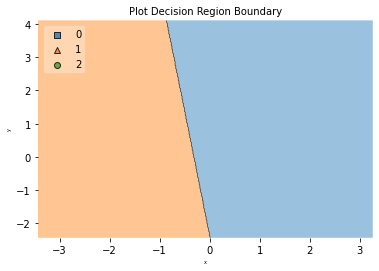

In [15]:
from mlxtend.plotting import plot_decision_regions
value=1.5
widght=0.75
plot_decision_regions(X, Y_num, clf=keras_model_no_ohe, legend=2,feature_index=[0,1],
                      filler_feature_values={2: value, 3:value, 4:value,5:value,6:value,7:value,8:value,9:value,10:value,11:value},
                      filler_feature_ranges={2: widght, 3: widght,4:widght,5:widght,6:widght,7:widght,8:widght,9:widght,10:widght,11:widght})
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()

#Posible error por falta de variables visibles